# ALgoritmo SVM (Support Vectorial Machine)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sofa_sem import bit_error_rate

### Preparación de los datos

In [2]:
X1 = np.array([0.3, 0.42, 0.5, 0.4, 0.1, 0.35, 0.4, 0.55, 0.24, 0.1, 0.33, 0.45, 0.52, 
               0.43, 0.05, 0.3, 0.44, 0.2, 0.1, 0.3, 0.2, 0.53, 0.35, 0.35])
X2 = np.array([0.14, 0.7, 0.5, 0.3, 0.12, 0.31, 0.5, 0.52, 0.44, 0.2, 0.1, 0.6, 0.42, 
               0.35, 0.17, 0.36, 0.4, 0.4, 0.25, 0.6, 0.2, 0.2, 0.2, 0.55])
y = np.array([0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1])

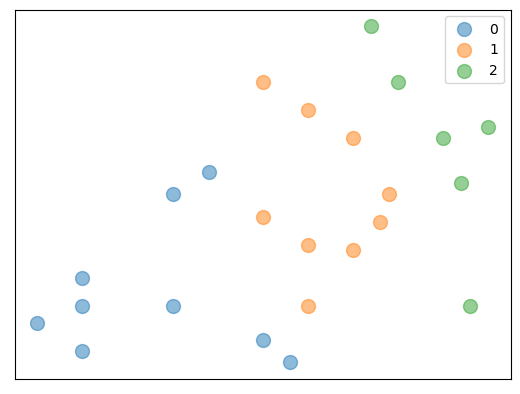

In [3]:
# Grafica de los datos de entrada
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X1[ix], X2[ix], label=g, s=100, marker='o', alpha=0.5)
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

In [4]:
# Unifica las caracteristicas X1 y X2
X = np.transpose(np.array([X1, X2]))

In [5]:
# Separa los datos de entrenamiento y los de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### Aplicación del modelo SVM

In [6]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [7]:
model.score(X_train, y_train)

0.9285714285714286

In [8]:
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7


El modelo efectivamente esta sobreajustado a los datos

### Busqueda de los mejores parámetros para el modelo y evitar el sobreajuste

In [9]:
param_grid = {'C':[0.001, 0.1, 1, 10, 100, 1000, 10000], 
              'gamma':[10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]}

In [10]:
grid = GridSearchCV(SVC(), param_grid, verbose=0)

In [11]:
grid.fit(X_train, y_train)

c:\Users\martinez\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05,
                                   1e-06]})

In [12]:
grid.best_params_

{'C': 10, 'gamma': 10}

In [13]:
grid.score(X_train, y_train)

1.0

In [14]:
grid_pred = grid.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, grid_pred))

Accuracy: 0.9


Se logró efectivamente eliminar el sobreajuste; se evidencia ya que los datos de test se han predicho con un 100% de certeza.

### Añadiendo un nuevo valor:

In [15]:
datos = np.array([[0.1, 0.40], [0.2, 0.55], [0.4, 0.35], [0.55, 0.45]])

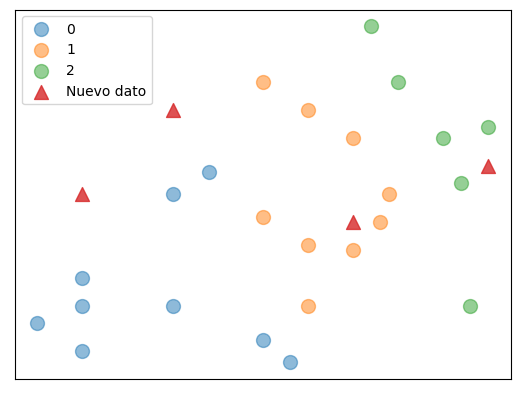

In [16]:
# Grafica con los nuevos datos
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X1[ix], X2[ix], label=g, s=100, marker='o', alpha=0.5)
plt.scatter(datos[:, 0], datos[:, 1], label='Nuevo dato', s=100, marker='^', alpha=0.8)
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

In [17]:
#Calcular clase y probabilidades sin el grid
print("Clase:", model.predict(datos))

Clase: [0 1 1 2]
